# Programming Basics
## An introduction to programming and python.

During this class, we'll be using this web page to write and run our programs, so you don't need anything other than the web browser you are currently using. 

## Learning objectives
In this lesson we're going to learn:
* What is programming
* What is a programming language and why do we need them
* What can be done with programming
* Key programming concepts e.g. variables, looping, conditions

### What is programming?
* Solving a problem by writing by writing computer code.
* Programming is both an art and science, being creative and understanding how things work.
* An algorithm is a list of rules to follow in order to solve a problem. Algorithms are used in everyday tasks, such as a cake recipe or a tying your shoelace.
* Programs are created to implement algorithms. 
* Algorithms can be represented as pseudocode or a flowchart, and programming is the translation of these into a computer program.
* To tell a computer to do something, a program must be written to tell it exactly what to do and how to do it.
* If an algorithm has been designed, the computer program will follow this algorithm, step-by-step, which will tell the computer exactly what it should do.

### What is a programming language?
* A programming language is an artificial language that a computer understands.
* The language is made up of series of statements that fit together to form instructions. These instructions tell a computer what to do.
* Programming languages are designed to be easy for a human to understand and write in. However, a computer cannot run programs written in these languages directly.
* Most programming languages have to be translated into machine code before the computer can execute the instructions.
* There are many different programming languages, some more complicated and complex than others. For this class we will be using python to understand some of the basics of programming.

### Why do we need a programming language?
* You need a programming language in computer programming for the same reason you need a natural language in your everyday life : **to communicate and simplify things.**
* Consider a deaf-mute person, how he/she communicates? They use a code, in this case not the speaking language but the signs language, but for them this code has the same function, is an interface on the outside world.
* The other function of a code is to simplify things, to give them a structure, to help you build more complex things giving you simpler tools.
* Imagine that you don’t have any programming language, the only code that you have is the binary system, it would be impractical to write an entire program , that solves a real problem, using just 0’s and 1’s.
* Programming languages are an inteface between humans and computer, they allow us to communicate with computers in order to accomplish things.

### What can we do with programming?
* There is literally an unlimited number of things that can be created with code. Imagine an artist with a blank canvas, it can be difficult to know what to create, but you can create anything.
* If you consider anything that you have interacted with that is electronic in nature, chances are there has been some sort of programming involved in it. Your washing machine, your television, your phone. These all need programming to function.
* Take this example of train times. In just a few lines of code, we can get a list of all the train leaving the station, if they are on time and which stations they will stop at.

In [83]:
import bs4 as bs
import urllib.request

# https://www.opendatani.gov.uk/dataset/real-time-rail-stations-arrivals-and-departures/resource/490fe701-0e7b-4030-a4b0-9ede8c0d85cf
source = urllib.request.urlopen('https://apis.opendatani.gov.uk/translink/3043AF.xml').read()
soup = bs.BeautifulSoup(source, 'xml')

print(soup.find('StationBoard').attrs['name'], soup.find('StationBoard').attrs['Timestamp'], "\n----")
for train in soup.find_all('Service'):
    depart = train.find('DepartTime').attrs['time']
    delay = train.find('ExpectedDepartTime').attrs['time']
    dests = train.find_all('CallingPoint')
    stations = []
    for dest in dests:
        stations.append(dest.attrs['Name'])

    print(depart, delay, ", ".join(stations))

Lanyon Place 07/03/2019 15:08:00 
----
1512 On time Titanic Quarter, Sydenham, Holywood, Marino, Cultra, Seahill, Helen's Bay, Carnalea, Bangor West
1520 On time Yorkgate, Mossley West, Antrim, Ballymena, Cullybackey, Ballymoney, Coleraine, Castlerock, Bellarena
1522 On time Botanic, City Hospital
1525 On time Yorkgate, Whiteabbey, Jordanstown, Greenisland, Trooperslane, Clipperstown, Carrickfergus, Downshire, Whitehead, Ballycarry, Magheramorne, Glynn
1529 On time Botanic, City Hospital, Great Victoria St, Lisburn, Moira, Lurgan
  
1541 On time Botanic, City Hospital, Great Victoria St, Lisburn, Moira, Lurgan
1542 On time Titanic Quarter, Sydenham, Holywood, Marino, Cultra, Seahill, Helen's Bay, Carnalea, Bangor West
1552 On time Botanic, City Hospital
1555 On time Yorkgate, Whiteabbey, Jordanstown, Greenisland, Trooperslane, Clipperstown, Carrickfergus, Downshire, Whitehead, Ballycarry, Magheramorne, Glynn, Larne Town
1600 On time Botanic, City Hospital, Great Victoria St, Lisburn, M

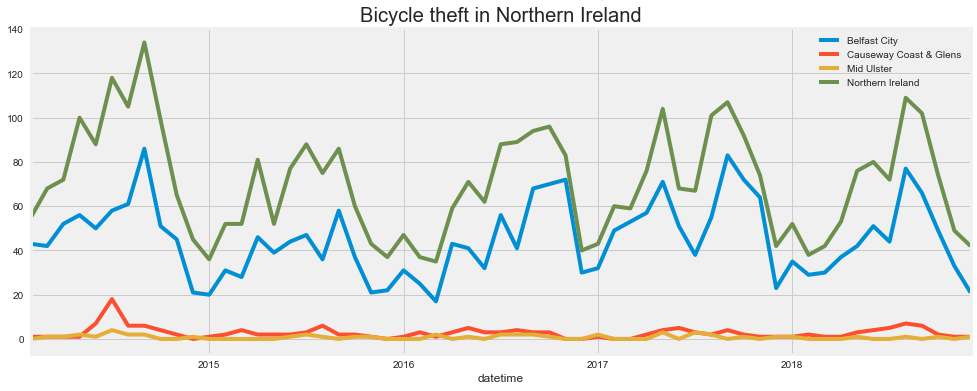

In [81]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
crime =  'Bicycle theft' # 'Total police recorded crime', 'Possession of drugs'

data_url = 'https://www.opendatani.gov.uk/dataset/80dc9542-7b2a-48f5-bbf4-ccc7040d36af/resource/6fd51851-df78-4469-98c5-4f06953621a0/download/police-recorded-crime-monthly-data.csv'
df = pd.read_csv(data_url, parse_dates={'datetime': ['Calendar_Year', 'Month']})
df.set_index('datetime', inplace=True)
bikes = df.loc[(df['Crime_Type'] == crime) & (df['Data_Measure'] == 'Police Recorded Crime') & (df['Policing_District'].isin(['Northern Ireland', 'Belfast City', 'Mid Ulster', 'Causeway Coast & Glens'])) & (df.index > pd.to_datetime('2014'))]
bikes = bikes.drop(['Crime_Type', 'Data_Measure'], axis=1)
bikes['Count'] = pd.to_numeric(bikes['Count'], errors='ignore')
fig, ax = plt.subplots(figsize=(15, 6))
plt.style.use('fivethirtyeight')
bikes.groupby('Policing_District')['Count'].plot(legend=True, title='{0} in Northern Ireland'.format(crime))
plt.show()

### Data Types
#### Strings
A string is really just a list of single characters. This tells the computer that this is text and not any of it's other special data types. 

In [84]:
"cat"

'cat'

#### Integers (numbers)
To tell the computer we are using a number, we simply type the number. 


In [85]:
4354

4354

You can add numbers together, or do any calculations on them you like.

In [86]:
3 + 4 * 12 / 9 * ( 9 / 3)

19.0

Notice that we do not use `"` this time. That's because we need the computer to know we mean a number and not text. You can think of this as the difference between '7' and 'seven'. We can use 7 in a mathmatical formula, but we would not use seven for calculations. One is a number and one is a string.

#### Variables
Variables are just a name of a data type that we can store information in. Think of a variable like a box with a label on it. The name of the variable is the label, and the contents of the box is what we're storing in it. 

In this example we store a name in a variable called name

In [87]:
name = "Michael"

Notice that we have used a string after the `=` sign. This means that we have stored a string, or text, in the variable. This is the equivalent of putting a single piece of paper in our box labeled 'name' that says 'Michael'

We can also store numbers in variables

In [88]:
age = 36

This would be like putting a piece of paper saying '36' in a new box labled 'age'.

#### Lists (arrays)
A list is a collection of data types. In python all these data types can be different.

In [89]:
[name, "Hello", 89]

['Michael', 'Hello', 89]

This is a list of a variable, a string and an integer. To stick with our analogy, this would be a box, a piece of paper with Hello and an other piece of paper with 89. A list is like a tall set of drawers, where we can put different things in each of the drawers. We can also put lists into variables

In [90]:
my_list = [name, "Hello", 89]

Although we'd need a really big box, this would be like putting a set of drawers inside a box label 'my_list'

#### Dictionaries (hash table / hash map)
If a list is like a set of drawers, then a dictionary is like a set of drawers with labels. 
When we just have a set of drawers, if we want to find something, we need to look inside every drawer to find it. If we have labels on the drawers, then we can go directly to the drawer that contains the thing we want. 

In [91]:
my_dict = {"name": "Michael",
           "dog": "Zero",
           "colour": "Red"}

If we want to look at a variable that we have assigned something to, we can use the `print` statement.

In [92]:
my_dict = {"name": "Michael",
           "dog": "Zero",
           "colour": "Red"}

print(my_dict)

{'name': 'Michael', 'dog': 'Zero', 'colour': 'Red'}


###  Control Structures
Now that we have some variables and data types, we need to be able to do something with them. This is how we start to write actual programs. 

#### If
This allows us to only execute statement(s) if a condtion is met.

In [93]:
age = 18
if age >= 18:
    print("Have a beer!")

if age < 18:
    print("Don't get caught having a beer!")

Have a beer!


#### Else
This is only ever used alongside an `if` statement. It means when the condition in the `if` is not met, we should do something `else`. So the above code could be rewritten like this

In [94]:
age = 17
if age >= 18:
    print("Have a beer!")
else:
    print("Don't get caught having a beer!")

Don't get caught having a beer!


### Looping
#### For
If we take the example of the drawers and wanting to look inside each of them. If we were to explain to someone what to do, you could say:
* look in the first drawer
* look in the second drawer
* look in the third drawer
* look in the fourth drawer

To write this in code you could do:

In [95]:
my_drawers = ['thing', 'another thing', 'more?', 'ok last one']
print(my_drawers[0])
print(my_drawers[1])
print(my_drawers[2])
print(my_drawers[3])

thing
another thing
more?
ok last one


Though, that's a lot of instructions, instead if we were to tell someone to search the drawers we could say:
* `for` each of the drawers you find, look inside it

This is the same for writing a program. We just tell it to look in each of the drawers:

In [96]:
my_drawers = ['thing', 'another thing', 'more?', 'ok last one']
for drawer in my_drawers:
    print(drawer)

thing
another thing
more?
ok last one


You can see the output is the same for each, but the second is much easier to read and write. This becomes especially important when you have long lists of things.

### While
This means that we should keep executing statement(s) until a condition is met.

This time, lets consider doing press ups. If we want to do ten pressups we could say

In [97]:
pressups = 0
while pressups < 10:
    pressups += 1
    print("I'm doing pressup number ", pressups)


I'm doing pressup number  1
I'm doing pressup number  2
I'm doing pressup number  3
I'm doing pressup number  4
I'm doing pressup number  5
I'm doing pressup number  6
I'm doing pressup number  7
I'm doing pressup number  8
I'm doing pressup number  9
I'm doing pressup number  10


### Functions
A function is a way to describe a list of actions. This means we can use it as many times as we want, without having to write it everytime. We can use our press up example

In [98]:
def do_pressups(name, number_to_do):
    pressups = 0
    while pressups < number_to_do:
        pressups += 1
        print(name, "is doing pressup number ", pressups)
        
do_pressups('Michael', 3)
do_pressups('Matt', 5)

Michael is doing pressup number  1
Michael is doing pressup number  2
Michael is doing pressup number  3
Matt is doing pressup number  1
Matt is doing pressup number  2
Matt is doing pressup number  3
Matt is doing pressup number  4
Matt is doing pressup number  5


The first part that says `def` is the defintion. Then the words inside the brackets are the variables it needs to operate. Then everything after the colon (below that line) is the code that we want to run. 

Then later in our program, we can call that function by doing:

```python
do_pressups('Some person', number_of_pressups)
```

### To do
* Classes
* Add to analogies, sharing code, sharing cake recipes, import blah, building upon what's already there
* Libraries